In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [23]:
bank = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Portuguese%20Bank%20Marketing/Bank%20Marketing.csv")
bank

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [24]:
bank.isna().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

In [25]:
bank.Contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
sum(bank.Job=='unknow')

0

<AxesSubplot:xlabel='count', ylabel='Job'>

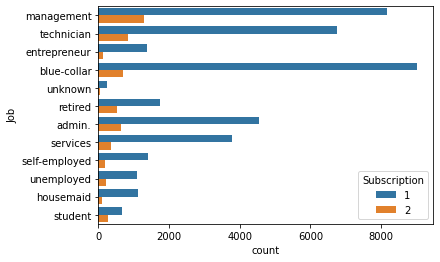

In [27]:
sns.countplot(y='Job',hue='Subscription',data=bank)

In [28]:
bank.drop(["Contact"], inplace=True, axis=1)
bank.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,1


In [29]:
bank.loc[bank['Job']=='unknown','Subscription'].value_counts()

1    254
2     34
Name: Subscription, dtype: int64

<AxesSubplot:xlabel='Subscription', ylabel='count'>

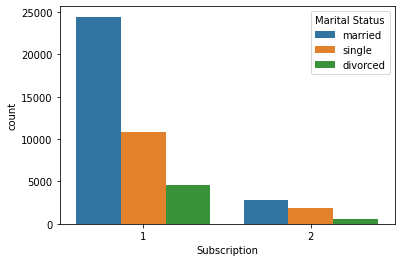

In [30]:
sns.countplot(x='Subscription',hue='Marital Status',data=bank)

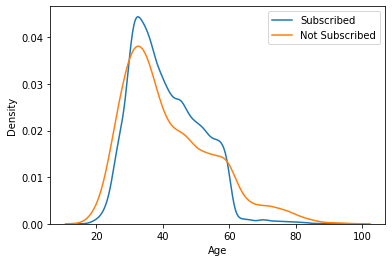

In [31]:
sns.kdeplot(bank.loc[bank['Subscription']==1,'Age'],label='Subscribed')
sns.kdeplot(bank.loc[bank['Subscription']==2,'Age'],label='Not Subscribed')
plt.legend()

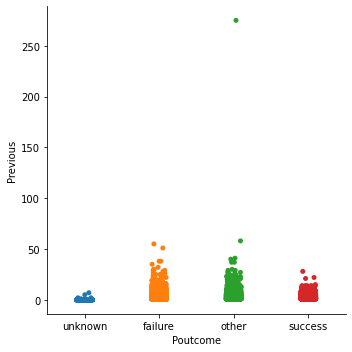

In [32]:
sns.catplot(y='Previous',x='Poutcome',data=bank)

In [33]:
bank["Poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: Poutcome, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

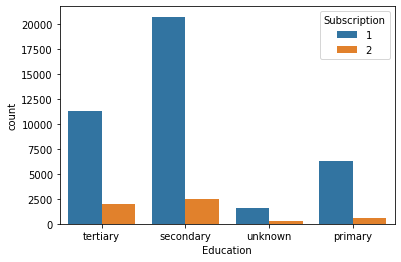

In [34]:
sns.countplot(x='Education',hue='Subscription',data=bank)

<AxesSubplot:xlabel='Campaign', ylabel='Count'>

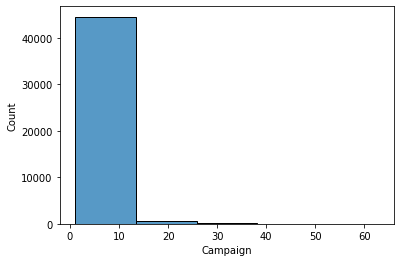

In [35]:
sns.histplot(x='Campaign',bins=5,data=bank)

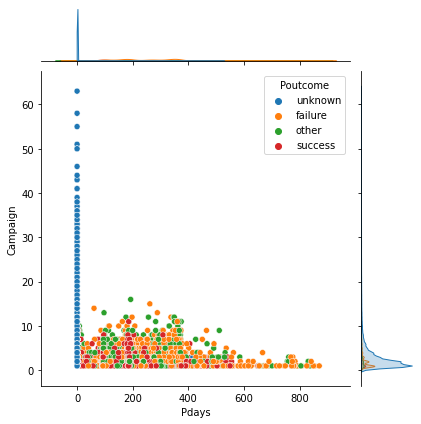

In [36]:
sns.jointplot(y='Campaign',x='Pdays',hue='Poutcome',data=bank)

In [37]:
job_dummy=pd.get_dummies(bank['Job'],drop_first=True)
job_dummy

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,1,0,0,0,0,0,0
45209,1,0,0,0,0,0,0,0,0,0,0


In [38]:
bank=bank.join(job_dummy)
bank.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,tertiary,no,2143,yes,no,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,5,may,...,0,0,0,0,0,0,0,0,0,1


In [39]:
bank.drop('Job',inplace=True,axis=1)
bank.head()

,Age,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,married,tertiary,no,2143,yes,no,5,may,261,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,5,may,151,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,5,may,76,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,5,may,92,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,5,may,198,...,0,0,0,0,0,0,0,0,0,1


In [40]:
marital=LabelEncoder()
bank['Marital Status']=marital.fit_transform(bank['Marital Status'])
bank['Education']=marital.fit_transform(bank['Education'])
bank['Last Contact Month']=marital.fit_transform(bank['Last Contact Month'])
bank['Poutcome']=marital.fit_transform(bank['Poutcome'])
bank['Housing Loan']=marital.fit_transform(bank['Housing Loan'])
bank['Personal Loan']=marital.fit_transform(bank['Personal Loan'])
bank['Credit']=marital.fit_transform(bank['Credit'])
bank.head()

,Age,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,1,2,0,2143,1,0,5,8,261,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,5,8,151,...,0,0,0,0,0,0,0,1,0,0
2,33,1,1,0,2,1,1,5,8,76,...,1,0,0,0,0,0,0,0,0,0
3,47,1,3,0,1506,1,0,5,8,92,...,0,0,0,0,0,0,0,0,0,0
4,33,2,3,0,1,0,0,5,8,198,...,0,0,0,0,0,0,0,0,0,1


In [41]:
bank.dtypes

Age                      int64
Marital Status           int64
Education                int64
Credit                   int64
Balance (euros)          int64
Housing Loan             int64
Personal Loan            int64
Last Contact Day         int64
Last Contact Month       int64
Last Contact Duration    int64
Campaign                 int64
Pdays                    int64
Previous                 int64
Poutcome                 int64
Subscription             int64
blue-collar              uint8
entrepreneur             uint8
housemaid                uint8
management               uint8
retired                  uint8
self-employed            uint8
services                 uint8
student                  uint8
technician               uint8
unemployed               uint8
unknown                  uint8
dtype: object

<AxesSubplot:xlabel='Credit', ylabel='count'>

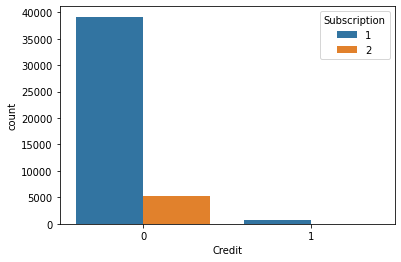

In [42]:
sns.countplot(x='Credit',hue='Subscription',data=bank)

<AxesSubplot:xlabel='Housing Loan', ylabel='count'>

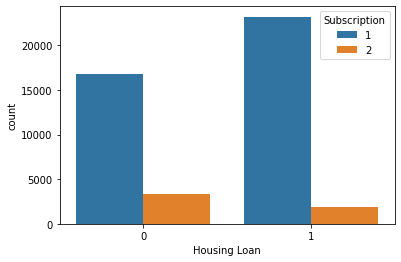

In [43]:
sns.countplot(x='Housing Loan',hue='Subscription',data=bank)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

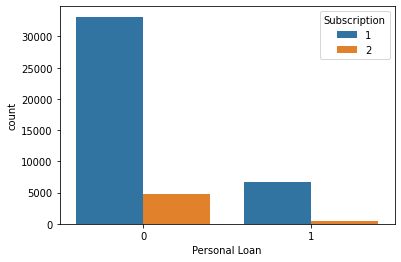

In [44]:
sns.countplot(x='Personal Loan',hue='Subscription',data=bank)

In [45]:
def add_loans(loan):
    x=loan[0]+loan[1]
    if (x==0):
        return 0
    else:
        return 1
    
bank['Loan']=bank[['Housing Loan','Personal Loan']].apply(add_loans,axis=1)
bank['Loan']

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: Loan, Length: 45211, dtype: int64

<AxesSubplot:xlabel='Loan', ylabel='count'>

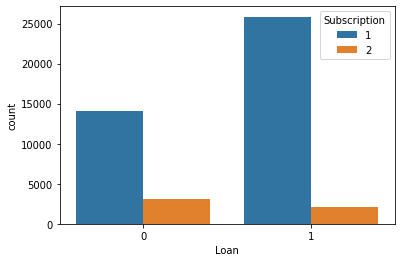

In [46]:
sns.countplot(x='Loan',hue='Subscription',data=bank)

In [47]:
bank.drop(['Housing Loan','Personal Loan'],axis=1,inplace=True)
bank.columns

Index(['Age', 'Marital Status', 'Education', 'Credit', 'Balance (euros)',
       'Last Contact Day', 'Last Contact Month', 'Last Contact Duration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'Loan'],
      dtype='object')

In [48]:
bank.head()

,Age,Marital Status,Education,Credit,Balance (euros),Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,Loan
0,58,1,2,0,2143,5,8,261,1,-1,...,0,1,0,0,0,0,0,0,0,1
1,44,2,1,0,29,5,8,151,1,-1,...,0,0,0,0,0,0,1,0,0,1
2,33,1,1,0,2,5,8,76,1,-1,...,0,0,0,0,0,0,0,0,0,1
3,47,1,3,0,1506,5,8,92,1,-1,...,0,0,0,0,0,0,0,0,0,1
4,33,2,3,0,1,5,8,198,1,-1,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

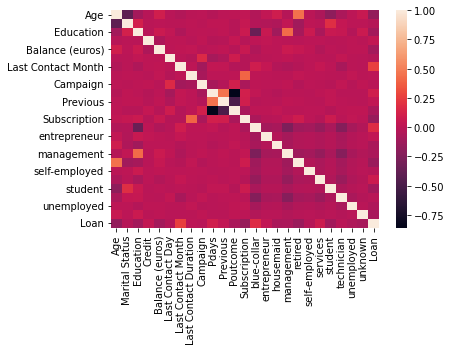

In [49]:
sns.heatmap(bank.corr())

In [50]:
X=bank.drop(['Subscription'],axis=1)
y=bank['Subscription']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=14)
model_log=LogisticRegression(solver='liblinear')
model_rf=RandomForestClassifier(n_estimators=9)
model_log.fit(X_train,y_train)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=9)

In [51]:
LR=model_log.predict(X_test)
RF=model_rf.predict(X_test)
model_log.score(X_test,y_test)

0.8890445296372751

In [52]:
model_rf.score(X_test,y_test)

0.8961958124447066